In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


In [2]:
df = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv',index_col='id')
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


<AxesSubplot:>

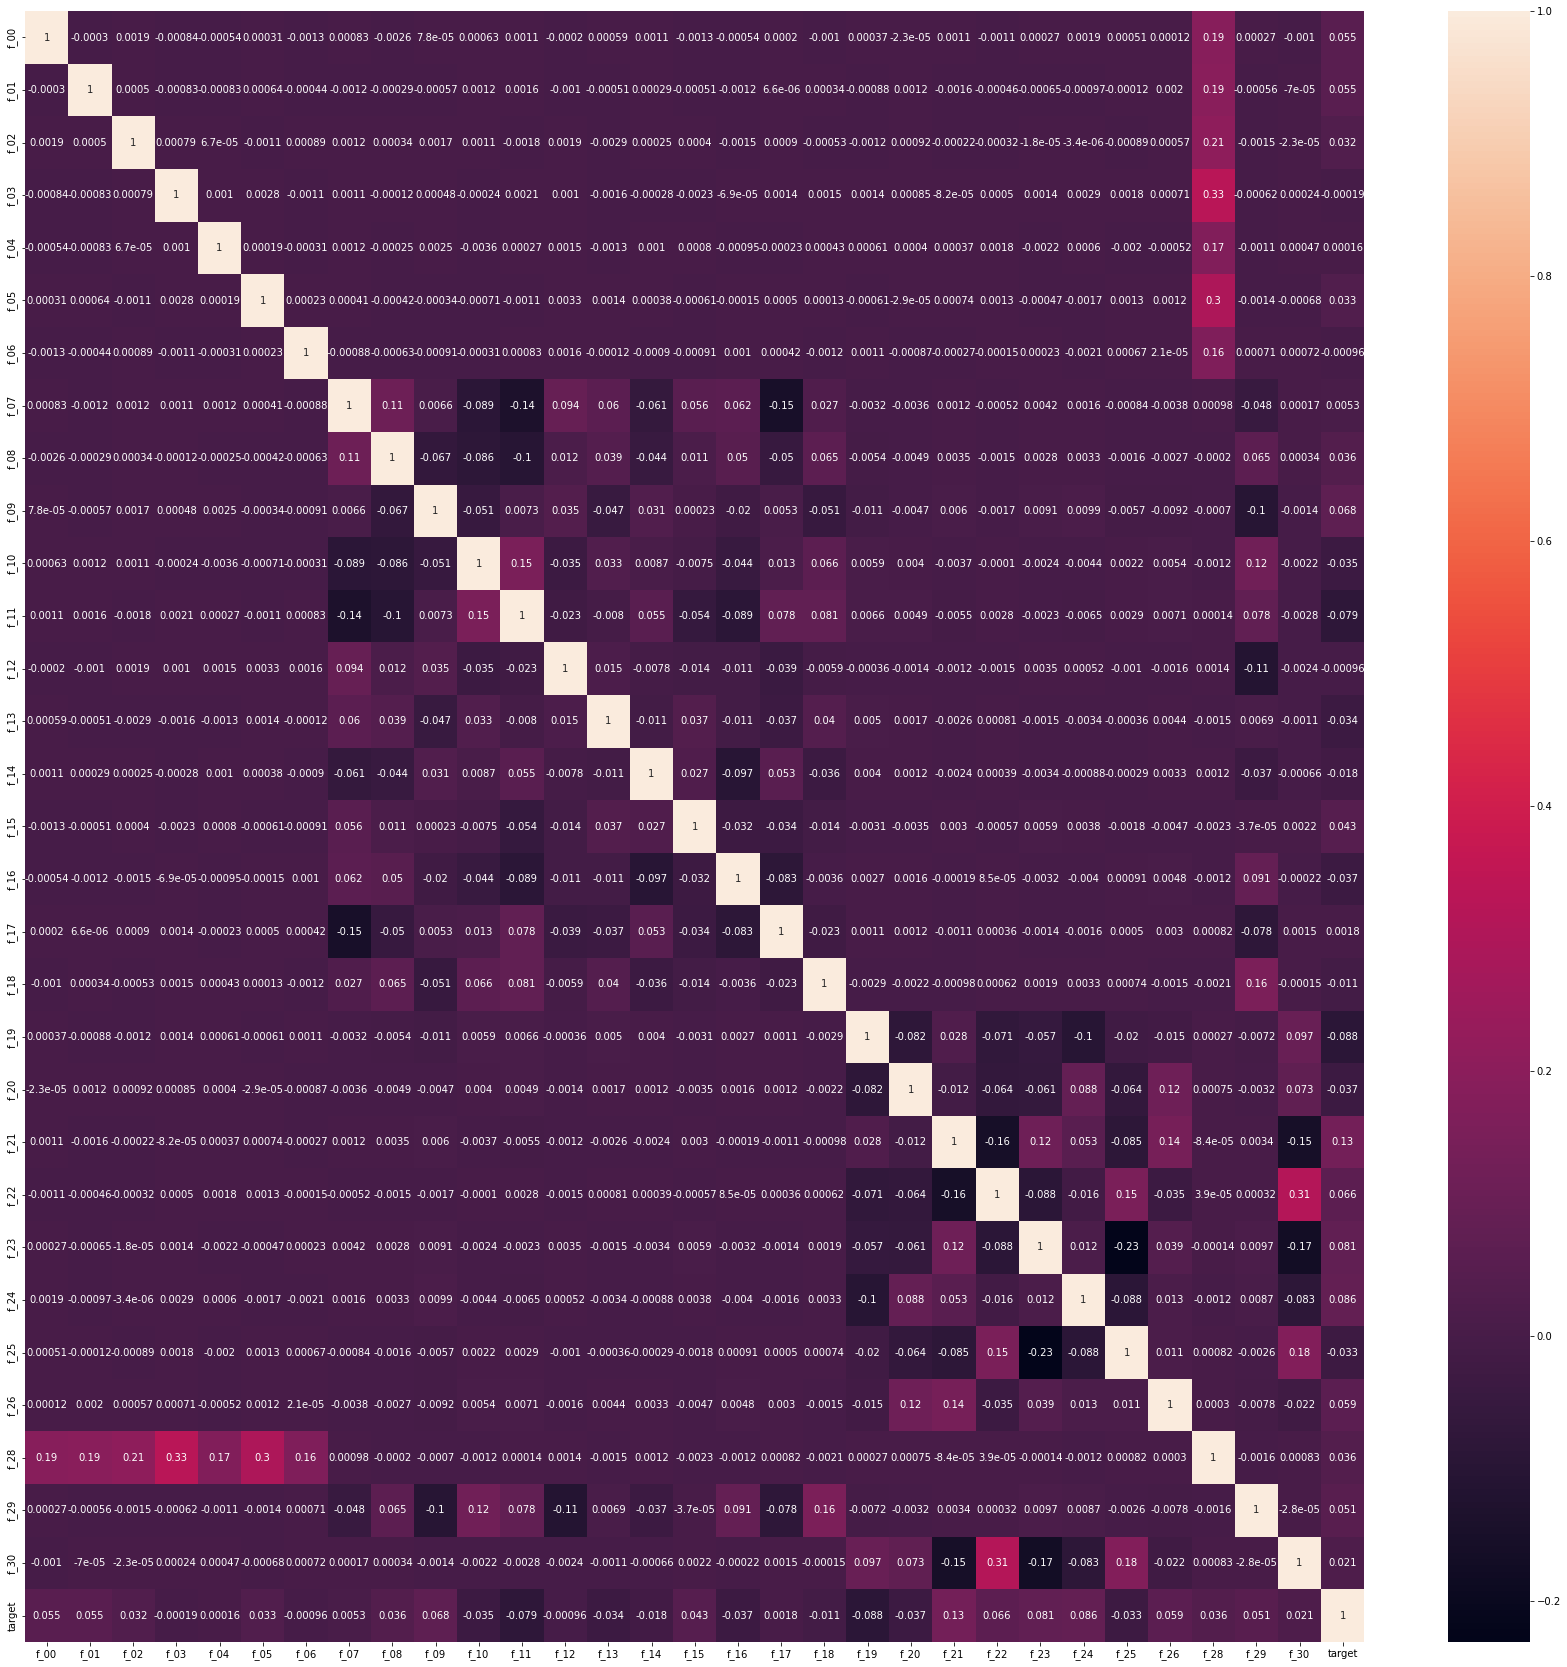

In [3]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,ax=ax)

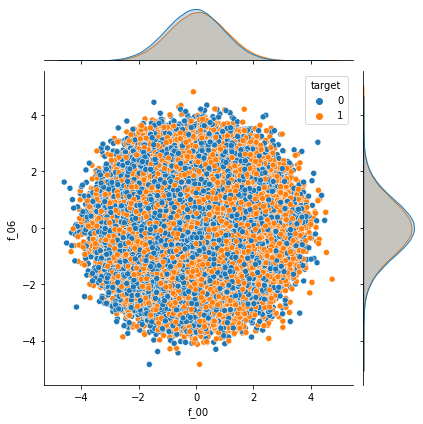

In [4]:
sns.jointplot(data=df,x='f_00',y='f_06',hue='target')

In [5]:
df['f_27'].str.count('A')

id
0         4
1         3
2         5
3         2
4         0
         ..
899995    1
899996    0
899997    2
899998    5
899999    3
Name: f_27, Length: 900000, dtype: int64

In [7]:
# from sklearn.cluster import KMeans
# X = df.drop(columns=['target','f_27'])
# kmeans = KMeans(n_clusters=2)
# X['cluster'] = kmeans.fit_predict(X)

In [8]:
df.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [47]:
df.iloc[:,:7].describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668


In [44]:
df.iloc[:,7:19].describe()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,2.031460,2.057998,2.362431,2.177637,1.803392,2.842373,2.239778,1.514686,2.101132,2.096713,1.858518,2.065131
std,1.656172,1.590955,1.637706,1.645953,1.537487,1.762835,1.538426,1.359213,1.569093,1.560169,1.467675,1.564783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
max,15.000000,16.000000,14.000000,14.000000,13.000000,16.000000,12.000000,14.000000,14.000000,15.000000,14.000000,13.000000


In [62]:
df.iloc[:,7:19].nunique()

f_07    16
f_08    16
f_09    15
f_10    15
f_11    14
f_12    16
f_13    13
f_14    14
f_15    15
f_16    16
f_17    14
f_18    14
dtype: int64

In [46]:
df.iloc[:,19:27].describe()

,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,0.308713,-0.178730,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591
std,2.316026,2.400494,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020
min,-11.280941,-11.257917,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577
25%,-1.236061,-1.804612,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598
50%,0.330249,-0.190571,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212
75%,1.880517,1.444508,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219
max,12.079667,11.475325,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041


In [43]:
df.iloc[:,27:].describe()

,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.380876,0.345661,1.002654,0.486488
std,238.773054,0.475584,0.818989,0.499818
min,-1229.753052,0.000000,0.000000,0.000000
25%,-159.427418,0.000000,0.000000,0.000000
50%,-0.519808,0.000000,1.000000,0.000000
75%,158.987357,1.000000,2.000000,1.000000
max,1229.562577,1.000000,2.000000,1.000000


In [3]:
from string import ascii_uppercase
for c in ascii_uppercase:
    df[c] = df['f_27'].str.count(c)

In [10]:
df.iloc[:,32:].sum()

A    2214818
B    2919752
C    1331088
D     926075
E     537776
F     283771
G     147484
H      84653
I      59478
J      50043
K      47008
L      46099
M      46104
N      45943
O      45442
P      45277
Q      44641
R      43438
S      41835
T      39275
U          0
V          0
W          0
X          0
Y          0
Z          0
dtype: int64

In [58]:
50000/len(df)

0.05555555555555555

In [4]:
df = df.iloc[:,:52].drop(columns=['f_27'])

In [5]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,K,L,M,N,O,P,Q,R,S,T
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,0,0,0,0,0,0,0,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,0,0,0,0,0,0,0,0,0,0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,1,0,0,0,0,0,0,0,0,0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0,0,0,0,0,0,0,0,0,0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.iloc[:,7:19] = df.iloc[:,7:19].astype('float64')
df['f_30'] =  df['f_30'].astype('float64')

In [106]:
df.dtypes

f_00      float64
f_01      float64
f_02      float64
f_03      float64
f_04      float64
f_05      float64
f_06      float64
f_07      float64
f_08      float64
f_09      float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23      float64
f_24      float64
f_25      float64
f_26      float64
f_28      float64
f_29        int64
f_30      float64
target      int64
A           int64
B           int64
C           int64
D           int64
E           int64
F           int64
G           int64
H           int64
I           int64
J           int64
K           int64
L           int64
M           int64
N           int64
O           int64
P           int64
Q           int64
R           int64
S           int64
T           int64
dtype: object

In [17]:
X = df.copy()
Y = X.pop('target')

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit_transform(X)

In [19]:
scaled_X = scaler.fit_transform(X.loc[:,X.dtypes == float])

In [20]:
X.loc[:,X.dtypes == float] = pd.DataFrame(scaled_X,columns=X.loc[:,X.dtypes == float].columns)

In [21]:
X.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_28    0
f_29    0
f_30    0
A       0
B       0
C       0
D       0
E       0
F       0
G       0
H       0
I       0
J       0
K       0
L       0
M       0
N       0
O       0
P       0
Q       0
R       0
S       0
T       0
dtype: int64

In [22]:
# import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=42
)
# xgb_model = xgb.XGBClassifier()

In [20]:
# from sklearn.metrics import accuracy_score
# xgb_model.fit(X_train, y_train)

# preds = xgb_model.predict(X_test)

# accuracy_score(y_test, preds)

0.5964044444444444

In [24]:
# X_train.isnull().sum()

In [43]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(500,input_dim=50))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [44]:
X_train.shape
# batches = gen.flow(X_train, y_train, batch_size=4096)
# val_batches=gen.flow(X_val, y_val, batch_size=4096)

(675000, 50)

In [45]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
660/660 [==============================] - 14s 21ms/step - loss: 0.3798 - accuracy: 0.8265 - val_loss: 0.2903 - val_accuracy: 0.8756
Epoch 2/20
660/660 [==============================] - 13s 19ms/step - loss: 0.2357 - accuracy: 0.9015 - val_loss: 0.1978 - val_accuracy: 0.9193
Epoch 3/20
660/660 [==============================] - 13s 20ms/step - loss: 0.1789 - accuracy: 0.9276 - val_loss: 0.1775 - val_accuracy: 0.9273
Epoch 4/20
660/660 [==============================] - 13s 19ms/step - loss: 0.1591 - accuracy: 0.9355 - val_loss: 0.1581 - val_accuracy: 0.9353
Epoch 5/20
660/660 [==============================] - 13s 19ms/step - loss: 0.1476 - accuracy: 0.9403 - val_loss: 0.1526 - val_accuracy: 0.9387
Epoch 6/20
660/660 [==============================] - 14s 20ms/step - loss: 0.1396 - accuracy: 0.9439 - val_loss: 0.1410 - val_accuracy: 0.9431
Epoch 7/20
660/660 [==============================] - 13s 19ms/step - loss: 0.1342 - accuracy: 0.9457 - val_loss: 0.1422 - val_accuracy:

In [92]:
test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv',index_col='id')
test

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,6,...,2.604048,1.122867,0.518110,1.243837,0.575111,0.076372,BCBCEBHMCD,204.186539,0,0
1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,4,...,3.029857,1.384682,-1.135740,2.982713,-1.511760,2.225218,BAABCADQFC,-97.694591,0,2
1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,2,...,4.021273,-1.845266,1.096011,-2.734508,-4.885955,-2.248739,AAAJCBGQBA,130.622745,1,0


In [93]:
for c in ascii_uppercase:
    test[c] = test['f_27'].str.count(c)

In [94]:
test

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,Q,R,S,T,U,V,W,X,Y,Z
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,0,0,0,0,0,0,0,0,0,0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,0,0,0,0,0,0,0,0,0,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,0,0,0,0,0,0,0,0,0,0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,1,0,0,0,0,0,0,0,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,6,...,0,0,0,0,0,0,0,0,0,0
1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,4,...,1,0,0,0,0,0,0,0,0,0
1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,2,...,1,0,0,0,0,0,0,0,0,0


In [95]:
test = test.iloc[:,:51].drop(columns=['f_27'])
test

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,K,L,M,N,O,P,Q,R,S,T
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,0,1,0,0,0,0,0,0,0,0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,0,0,0,0,0,0,0,0,0,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,1,0,0,0,0,0,0,0,0,0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,0,0,0,0,0,0,1,0,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,6,...,0,0,1,0,0,0,0,0,0,0
1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,4,...,0,0,0,0,0,0,1,0,0,0
1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,2,...,0,0,0,0,0,0,1,0,0,0


In [96]:
test.iloc[:,7:19] = test.iloc[:,7:19].astype('float64')
test['f_30'] =  test['f_30'].astype('float64')

In [97]:
test.dtypes

f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07    float64
f_08    float64
f_09    float64
f_10    float64
f_11    float64
f_12    float64
f_13    float64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_28    float64
f_29      int64
f_30    float64
A         int64
B         int64
C         int64
D         int64
E         int64
F         int64
G         int64
H         int64
I         int64
J         int64
K         int64
L         int64
M         int64
N         int64
O         int64
P         int64
Q         int64
R         int64
S         int64
T         int64
dtype: object

In [98]:
scaled_test = scaler.transform(test.loc[:,test.dtypes==float])
scaled_test

array([[ 0.44329632,  0.17335497, -1.00047586, ...,  2.17147547,
         0.41821868, -1.22425877],
       [-0.60598568, -0.30712794,  0.62617137, ...,  1.14564084,
        -0.27479225, -1.22425877],
       [ 0.30461484,  2.44592095,  0.24521443, ..., -0.11740322,
        -0.36446656, -0.00324112],
       ...,
       [-0.33178671, -0.33027695, -1.18606718, ..., -1.05262903,
         0.54865359, -1.22425877],
       [-2.03304901, -1.24056557,  0.96302976, ..., -1.49071538,
        -1.525484  , -1.22425877],
       [-0.08571557, -0.00329175,  2.22505709, ..., -0.2906524 ,
        -0.64930506, -0.00324112]])

In [ ]:
test_X = test.copy()

In [117]:
test_X.loc[:,test_X.dtypes == float] = pd.DataFrame(scaled_test,index=test.index,columns=test.loc[:,test.dtypes == float].columns)
test_X

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,K,L,M,N,O,P,Q,R,S,T
id,,,,,,,,,,,,,,,,,,,,,
900000,0.443296,0.173355,-1.000476,0.763976,0.187318,-1.075194,0.502626,2.396213,2.477760,-1.442525,...,0,1,0,0,0,0,0,0,0,0
900001,-0.605986,-0.307128,0.626171,-0.577429,-1.750070,1.355436,-0.190213,-0.622798,0.592099,0.999917,...,0,0,0,0,0,0,0,0,0,0
900002,0.304615,2.445921,0.245214,0.819474,0.360241,-1.332297,1.359411,0.584807,0.592099,0.999917,...,1,0,0,0,0,0,0,0,0,0
900003,0.154511,0.259170,-1.367563,-0.091791,-1.110279,-0.948885,1.119995,-1.226600,-1.293562,0.999917,...,0,0,0,0,0,0,1,0,0,0
900004,-1.653458,-0.425775,-0.668187,-0.320700,-0.088877,0.181443,1.785797,-0.018996,-0.036455,-0.221304,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.641110,0.897368,-0.524860,1.564855,-0.091695,-0.611228,0.536167,-1.226600,-0.665008,2.221137,...,0,0,1,0,0,0,0,0,0,0
1599996,-0.191698,-0.036441,-0.119646,0.586016,2.127194,0.568446,-0.051956,1.188609,0.592099,0.999917,...,0,0,0,0,0,0,1,0,0,0
1599997,-0.331787,-0.330277,-1.186067,1.023318,-0.482449,-0.107444,-0.967628,-0.622798,-0.665008,-0.221304,...,0,0,0,0,0,0,1,0,0,0


In [118]:
test_X

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,K,L,M,N,O,P,Q,R,S,T
id,,,,,,,,,,,,,,,,,,,,,
900000,0.443296,0.173355,-1.000476,0.763976,0.187318,-1.075194,0.502626,2.396213,2.477760,-1.442525,...,0,1,0,0,0,0,0,0,0,0
900001,-0.605986,-0.307128,0.626171,-0.577429,-1.750070,1.355436,-0.190213,-0.622798,0.592099,0.999917,...,0,0,0,0,0,0,0,0,0,0
900002,0.304615,2.445921,0.245214,0.819474,0.360241,-1.332297,1.359411,0.584807,0.592099,0.999917,...,1,0,0,0,0,0,0,0,0,0
900003,0.154511,0.259170,-1.367563,-0.091791,-1.110279,-0.948885,1.119995,-1.226600,-1.293562,0.999917,...,0,0,0,0,0,0,1,0,0,0
900004,-1.653458,-0.425775,-0.668187,-0.320700,-0.088877,0.181443,1.785797,-0.018996,-0.036455,-0.221304,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.641110,0.897368,-0.524860,1.564855,-0.091695,-0.611228,0.536167,-1.226600,-0.665008,2.221137,...,0,0,1,0,0,0,0,0,0,0
1599996,-0.191698,-0.036441,-0.119646,0.586016,2.127194,0.568446,-0.051956,1.188609,0.592099,0.999917,...,0,0,0,0,0,0,1,0,0,0
1599997,-0.331787,-0.330277,-1.186067,1.023318,-0.482449,-0.107444,-0.967628,-0.622798,-0.665008,-0.221304,...,0,0,0,0,0,0,1,0,0,0


In [119]:
test

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,K,L,M,N,O,P,Q,R,S,T
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6.0,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3.0,3.0,4.0,...,1,0,0,0,0,0,0,0,0,0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0.0,0.0,4.0,...,0,0,0,0,0,0,1,0,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0.0,1.0,6.0,...,0,0,1,0,0,0,0,0,0,0
1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4.0,3.0,4.0,...,0,0,0,0,0,0,1,0,0,0
1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1.0,1.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [121]:
predictions = model.predict(test_X)

In [124]:
submission = pd.read_csv('../input/tabular-playground-series-may-2022/sample_submission.csv')
submission

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5
...,...,...
699995,1599995,0.5
699996,1599996,0.5
699997,1599997,0.5
699998,1599998,0.5


In [125]:
submission['target'] = predictions

In [126]:
submission

,id,target
0,900000,9.999979e-01
1,900001,9.997146e-01
2,900002,7.642068e-08
3,900003,4.411668e-03
4,900004,7.816527e-01
...,...,...
699995,1599995,2.924106e-02
699996,1599996,9.931166e-01
699997,1599997,2.607492e-02
699998,1599998,9.272695e-04


In [127]:
submission.to_csv('submission.csv',index=False)